In [12]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 35.6/35.6 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np # to do various array operation
import matplotlib.pyplot as plt # to show the images
import os # iterate throug directories and join paths
import cv2 # to do image operation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input

In [2]:
base_dir = 'C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\daunTomatGab'
categories = ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'Healthy', 'powdery_mildew']

In [3]:
import splitfolders

splitfolders.ratio(base_dir,
                    output='C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\Dataset3',
                    seed=1337,
                    ratio=(.7, .2, .1)) 

Copying files: 31793 files [00:55, 575.44 files/s]


In [6]:
base_dir = 'C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\Dataset3'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

Ubah size Image

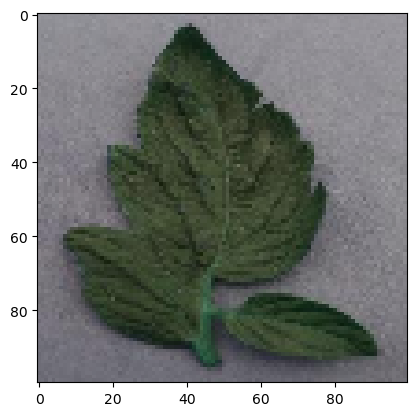

In [20]:
img_size = 100
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [99]:
        for img in os.listdir(train_dir):
            try:
                img_array = cv2.imread(os.path.join(train_dir,img))
            except Exception as e:
                pass


In [100]:
        for img in os.listdir(validation_dir):
            try:
                img_array = cv2.imread(os.path.join(validation_dir,img))
            except Exception as e:
                pass

In [76]:
val_data = []

def create_val_data():
    for category in categories:
        path = os.path.join(validation_dir, category) # path to categories dir
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                val_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_val_data() 

In [58]:
test_data = []

def create_test_data():
    for category in categories:
        path = os.path.join(test_dir, category) # path to categories dir
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                test_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_test_data() 

In [101]:
train_datagen = ImageDataGenerator(
                    rescale=1./255) 

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [103]:
train_data = np.array(train_data)
val_data = np.array(val_data)

In [104]:
train_generator = train_datagen.flow_from_directory(train_data,
                                                    batch_size=32,
                                                    target_size=(img_size, img_size),
                                                    class_mode='categorical',
                                                    color_mode= 'rgb', 
                                                    shuffle= True
                                                    )

val_generator = test_datagen.flow_from_directory(val_data,
                                                  batch_size=32,
                                                  target_size=(img_size, img_size),
                                                  class_mode='categorical',
                                                  color_mode= 'rgb', 
                                                  shuffle= True
                                                  )

ValueError: listdir: embedded null character in path

Create training data

In [94]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

22248
6352
3192


In [72]:
print(len(X))
print(len(y))
print(len(test_data))

0
0
3192


In [98]:
print(len(train_dir))
print(len(validation_dir))
print(len(test_dir))

73
71
72


In [8]:
print(img_array.shape)

(256, 256, 3)


Shuffle the data

In [88]:
import random

random.shuffle(training_data)

In [89]:
for sample in training_data[:10]:
    print(sample[1])

2
10
5
1
3
8
10
1
2
0


In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                           # 3 layer konvolusi
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),                                                      # layer input untuk deep learning neural network
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),                                  # 2 hidden layer
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(11, activation= 'softmax')  
])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 32)      

In [53]:
model.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [54]:
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
            print("\nAkurasi telah mencapai >90%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

In [55]:
history=model.fit(
      train_generator,
      steps_per_epoch=4,                    
      epochs=25,                            
      validation_data=val_generator,       
      verbose=2,
      validation_steps=4,             
      callbacks = [callbacks]
      )

Epoch 1/25
4/4 - 2s - loss: 2.4254 - accuracy: 0.0547 - val_loss: 2.3749 - val_accuracy: 0.0625 - 2s/epoch - 409ms/step
Epoch 2/25
4/4 - 1s - loss: 2.3566 - accuracy: 0.1328 - val_loss: 2.3618 - val_accuracy: 0.1250 - 900ms/epoch - 225ms/step
Epoch 3/25
4/4 - 1s - loss: 2.3744 - accuracy: 0.1484 - val_loss: 2.3889 - val_accuracy: 0.1562 - 905ms/epoch - 226ms/step
Epoch 4/25
4/4 - 1s - loss: 2.3911 - accuracy: 0.1328 - val_loss: 2.3612 - val_accuracy: 0.1406 - 809ms/epoch - 202ms/step
Epoch 5/25
4/4 - 1s - loss: 2.3708 - accuracy: 0.0938 - val_loss: 2.3794 - val_accuracy: 0.1328 - 902ms/epoch - 226ms/step
Epoch 6/25
4/4 - 1s - loss: 2.3793 - accuracy: 0.1406 - val_loss: 2.3531 - val_accuracy: 0.2266 - 912ms/epoch - 228ms/step
Epoch 7/25
4/4 - 1s - loss: 2.3382 - accuracy: 0.1406 - val_loss: 2.3690 - val_accuracy: 0.1016 - 921ms/epoch - 230ms/step
Epoch 8/25
4/4 - 1s - loss: 2.1970 - accuracy: 0.2188 - val_loss: 2.5710 - val_accuracy: 0.1328 - 960ms/epoch - 240ms/step
Epoch 9/25
4/4 - 1s

UnknownError: Graph execution error:

OSError: image file is truncated
Traceback (most recent call last):

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\ImageFile.py", line 239, in load
    s = read(self.decodermaxblock)

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\PngImagePlugin.py", line 932, in load_read
    cid, pos, length = self.png.read()

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\PngImagePlugin.py", line 177, in read
    length = i32(s)

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\_binary.py", line 85, in i32be
    return unpack_from(">I", c, o)[0]

struct.error: unpack_from requires a buffer of at least 4 bytes for unpacking 4 bytes at offset 0 (actual buffer size is 0)


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\utils\image_utils.py", line 440, in load_img
    img = img.convert("RGB")

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py", line 901, in convert
    self.load()

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\ImageFile.py", line 245, in load
    raise OSError("image file is truncated") from e

OSError: image file is truncated


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_5320]

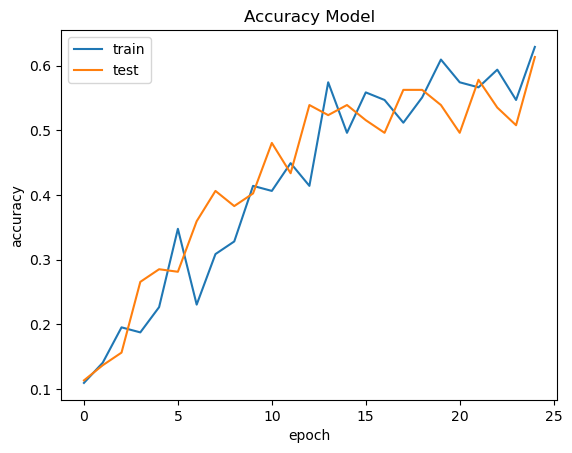

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

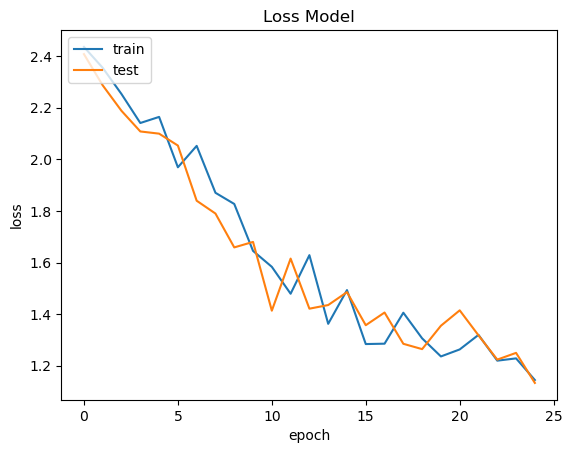

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()